# This is a the Test Simulation for MWM Compact Binary Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

## New in Gamma-0
- New Target List
- Created two cadences based on HMag 
 - Dim Targets follow WD cadence
 - Bright Targets follow GG cadence

In [2]:
ver = 'gamma-0'
cb_tab = Table.read('workspace/target_files/CB/{}/wdbinaries_allsky_sdssv_v0.fits'.format(ver))
cb_tab

source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,Jmag,Hmag,Kmag
,,,,,,,,mag,mag,mag
int64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32
5700017708894596096,125.8808234694888,-22.366570051672415,-5.386654654165877,-0.047513800354276,14.354373,14.66828,13.8827305,13.348,13.118,13.057
1140866119819280256,95.12854230819877,78.33822918070042,10.403830615240066,-57.99336915950352,10.655023,11.052461,10.126486,9.525,9.16,9.086
5672222574635034880,148.88690785784294,-17.697464974221674,0.003706158467882137,-18.823875423455547,16.355389,17.104479,15.49994,14.301,13.689,13.463
1330809669800050432,244.57447370701698,38.45391333061153,-9.461233913207327,-15.478869977731138,17.21771,18.287125,16.128843,14.541,13.882,13.639
656006127903374208,125.9420857195253,16.754298014190503,15.003755866701923,-35.040164439344636,16.295717,16.614016,15.800228,15.317,14.875,14.734
741316101229113600,155.15376229506887,29.376167153707833,-0.31100592409053895,-29.817684256419838,14.9159565,15.152008,14.516284,14.041,13.834,13.662
1940705612932723072,358.44312103336705,49.5487854071031,0.22730405029712367,-4.261646072537859,17.222836,17.655083,16.555435,15.723,15.325,15.077
5137789859733383936,28.900020998402166,-19.70651748907978,14.90367439322009,-47.39019883201379,19.062658,18.98468,19.1493,nan,nan,nan


## Define bright and Dim Classes
- All stars with 7<Hmag<11 are bright follow mwm_galactic_1x1 like cadence
- All stars with Hmag> 11 are dim and follow mwm_wd_2x1 like cadence

In [3]:
cb_bright_tab = cb_tab[(cb_tab['Hmag'] > 7) & (cb_tab['Hmag'] < 11)]
cb_bright_tab

/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,Jmag,Hmag,Kmag
,,,,,,,,mag,mag,mag
int64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32
1140866119819280256,95.12854230819877,78.33822918070042,10.403830615240066,-57.99336915950352,10.655023,11.052461,10.126486,9.525,9.16,9.086
5763516910579709952,133.94328334144038,-3.249115242354919,-17.469414367664704,-4.357841346865008,12.247271,12.567485,11.778548,11.267,10.972,10.928
2380417527102173568,352.06595458481456,-25.700005076224134,177.86248440851432,-24.01258825014633,10.843822,11.390101,10.180536,9.367,8.867,8.735
871089019116284416,110.857033881976,26.12515257590792,-14.93145074633594,-61.31384170020696,10.745428,11.20654,10.1704235,9.346,8.941,8.871
1139596768004981760,109.42663923499002,76.73876266835661,2.4890801739632327,-51.861236643699236,10.828191,11.303186,10.22291,9.477,9.017,8.907
2260953836398942336,292.850191873945,67.39914235121464,6.071923527015169,12.17301602764922,12.033644,12.553699,11.372099,10.367,10.052,9.827
6503059740071544064,348.3201379177376,-49.55468000776829,79.45366065148839,-88.1852500675673,12.787065,14.426068,11.554856,9.763,9.14,8.921
4593824868646456448,265.30351043844416,25.621014224897174,0.300223848440416,-9.292963019084754,10.930199,11.15182,10.545839,10.16,9.94,9.896


In [4]:
cb_dim_tab = cb_tab[cb_tab['Hmag'] >= 11]
cb_dim_tab

/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,Jmag,Hmag,Kmag
,,,,,,,,mag,mag,mag
int64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32
5700017708894596096,125.8808234694888,-22.366570051672415,-5.386654654165877,-0.047513800354276,14.354373,14.66828,13.8827305,13.348,13.118,13.057
5672222574635034880,148.88690785784294,-17.697464974221674,0.003706158467882137,-18.823875423455547,16.355389,17.104479,15.49994,14.301,13.689,13.463
1330809669800050432,244.57447370701698,38.45391333061153,-9.461233913207327,-15.478869977731138,17.21771,18.287125,16.128843,14.541,13.882,13.639
656006127903374208,125.9420857195253,16.754298014190503,15.003755866701923,-35.040164439344636,16.295717,16.614016,15.800228,15.317,14.875,14.734
741316101229113600,155.15376229506887,29.376167153707833,-0.31100592409053895,-29.817684256419838,14.9159565,15.152008,14.516284,14.041,13.834,13.662
1940705612932723072,358.44312103336705,49.5487854071031,0.22730405029712367,-4.261646072537859,17.222836,17.655083,16.555435,15.723,15.325,15.077
6637708644133622656,281.14016790082763,-56.52559685147131,-75.73871822458557,-49.47615098528255,13.406556,13.665528,12.971948,12.421,12.164,12.151
3962291842355447936,190.58184184502574,27.465422671734874,-74.07256205580671,-44.55817807990673,16.387043,16.333635,16.478802,16.685,16.592,16.164


/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


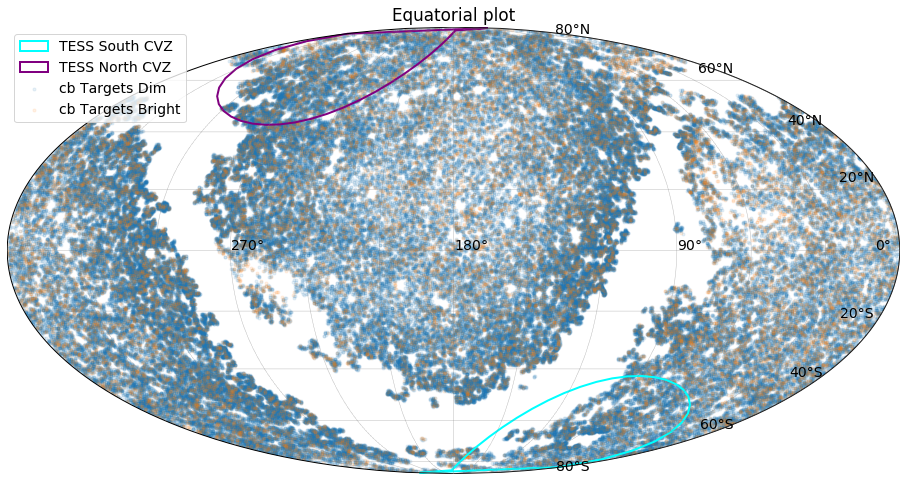

In [5]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot cb Targets
xcb,ycb = bmap(cb_dim_tab['ra'],cb_dim_tab['dec'])
bmap.scatter(xcb,ycb,marker='.',label='cb Targets Dim',alpha=0.1)
xcb,ycb = bmap(cb_bright_tab['ra'],cb_bright_tab['dec'])
bmap.scatter(xcb,ycb,marker='.',label='cb Targets Bright',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [6]:
target_tab = Table()

In [7]:
num_targets = len(cb_bright_tab)+len(cb_dim_tab)
target_tab['ra'] = np.concatenate([cb_dim_tab['ra'],cb_bright_tab['ra']])
target_tab['dec'] = np.concatenate([cb_dim_tab['dec'],cb_bright_tab['dec']])
cadence_arr = np.concatenate([np.repeat('mwm_cb_2x1',len(cb_dim_tab)),
                              np.repeat('mwm_cb_1x1',len(cb_bright_tab))])
target_tab['cadence'] = cadence_arr
target_tab['type'] = np.repeat('mwm_cb',num_targets)
target_tab['priority'] = np.repeat(np.array(15,dtype='int32'),num_targets)
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),num_targets)

In [8]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str10,str6,int32,float32
125.8808234694888,-22.366570051672415,mwm_cb_2x1,mwm_cb,15,1.0
148.88690785784294,-17.697464974221674,mwm_cb_2x1,mwm_cb,15,1.0
244.57447370701698,38.45391333061153,mwm_cb_2x1,mwm_cb,15,1.0
125.9420857195253,16.754298014190503,mwm_cb_2x1,mwm_cb,15,1.0
155.15376229506887,29.376167153707833,mwm_cb_2x1,mwm_cb,15,1.0
358.44312103336705,49.5487854071031,mwm_cb_2x1,mwm_cb,15,1.0
281.14016790082763,-56.52559685147131,mwm_cb_2x1,mwm_cb,15,1.0
190.58184184502574,27.465422671734874,mwm_cb_2x1,mwm_cb,15,1.0
218.49575672828553,-18.626359689369064,mwm_cb_2x1,mwm_cb,15,1.0


In [9]:
target_tab.write('{}/mwm_cb_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
The cadences are just straight copies from  mwm_galactic_1x1 and mwm_wd_2x1

In [10]:
cadence_tab = Table()

In [11]:
cadence_tab['cadence'] = ['mwm_cb_2x1','mwm_cb_1x1']
cadence_tab['nepochs'] = np.array([2,1],dtype='int32')
cadence_tab['delta'] = np.array([[0,180],[0,np.nan]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0,1],[0,np.nan]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0,3000],[0,np.nan]],dtype='float32')
cadence_tab['lunation'] = np.array(np.array([[0.35,0.35],[1,np.nan]],dtype='float32'))
cadence_tab['instrument'] = np.array([['boss','boss'],['boss',np.nan]])

In [12]:
cadence_tab

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
str10,int32,float32,float32,float32,float32,str4
mwm_cb_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss
mwm_cb_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,boss .. nan


In [13]:
cadence_tab['delta'].data

array([[  0., 180.],
       [  0.,  nan]], dtype=float32)

In [14]:
cadence_tab.write('{}/mwm_cb_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [15]:
test =  Table.read('{}/mwm_cb_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
bytes10,int32,float32,float32,float32,float32,bytes16
mwm_cb_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss
mwm_cb_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,boss .. nan
